### SI 370 - Homework #3: Applied Statistics

## Background

This homework assignment focuses on data from the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness).

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, with annual updates through 2019. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

You will be using data from the 2019 report.

Your main task in this assignment is to explore the data *using the data
manipulation, analysis, visualization, and applied statistical methods we covered in class* as well as those in the assigned readings. 

**You should also feel free to ask questions on Slack!**

Each question is worth the same number of points.  Points will be allocated according to the rubric posted in Canvas, and corresponds roughly to the following guidelines:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for  detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect. **Remember to complete the interpretation sections -- focus on interpreting your results rather than explaining what you did.**
- 0 points: Question not attempted.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

In [3]:
happiness2016 = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/world-happiness-2016.csv')

In [4]:
happiness = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/world-happiness-2019.csv')

In [5]:
happiness.shape

(156, 9)

In [6]:
happiness.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### <font color="magenta"> Q1: What are the top 5 correlation coefficients among "Happiness Score", Economy, Family, Health, Freedom, Trust, and Generosity? Provide a visualization as well as a written statement of your findings. 

In [7]:
happiness = happiness.drop(labels='Overall rank', axis=1)
happiness

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
df = pd.DataFrame(happiness.corr().unstack().sort_values(ascending=False,
                                                         key=abs))
df = df[df[0] != 1].drop_duplicates().reset_index()
df.head(5)

,level_0,level_1,0
0,GDP per capita,Healthy life expectancy,0.835462
1,Score,GDP per capita,0.793883
2,Score,Healthy life expectancy,0.779883
3,Score,Social support,0.777058
4,Social support,GDP per capita,0.754906


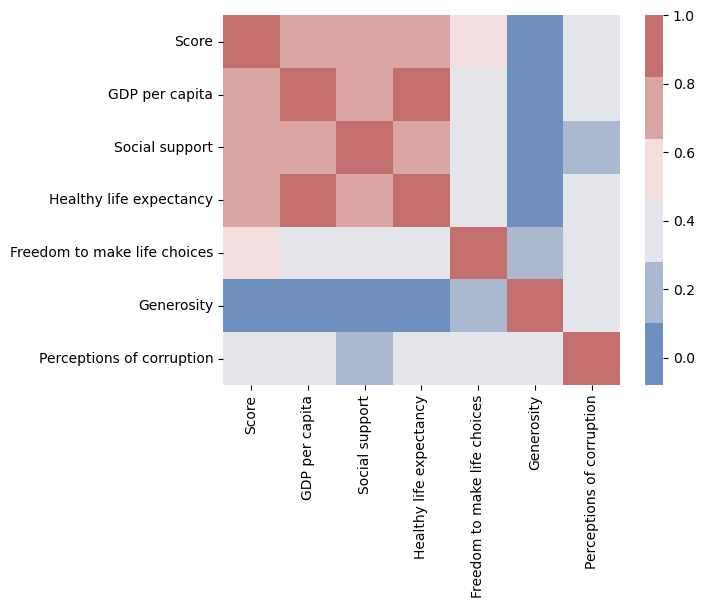

In [9]:
_ = sns.heatmap(happiness.corr(), cmap=sns.color_palette('vlag'))

The top 5 correlation coefficients among "Happiness Score", Economy, Family, Health, Freedom, Trust, and Generosity are in order as follows: GDP per capita and Healthy life expectancy (0.835), Happiness Score and GDP per capita (0.794), Happiness Score and Healthy life expectancy (0.780), Hapiness Score and Social support (0.777), and Social support and GDP per capita (0.755). The visualization shown is a heatmap illustrating the various correlation coefficients between each pair of the variables in the dataset. The previously mentioned correlation coefficients can be seen in light red. It makes sense to me that GDP per capita and Healthy life expectancy are the two variables with the largest correlation coefficient, as I would predict that healthy living is more likely in nations with a larger GPD per capita. It is also interesting how Generosity is seen with the lowest correlation coefficients with the other variables in the dataset.

### <font color='magenta'> Q2: Describe, using plots, the relationships between the following variables: </font>
1. Happiness vs. Family
2. Happiness vs. Economy
3. Happiness vs. Health
4. Happiness vs. Freedom
5. Happiness vs. Trust
6. Happiness vs. Generosity

You have, at this point, a wide variety of visualizations that you know how to generate.  Choose wisely!

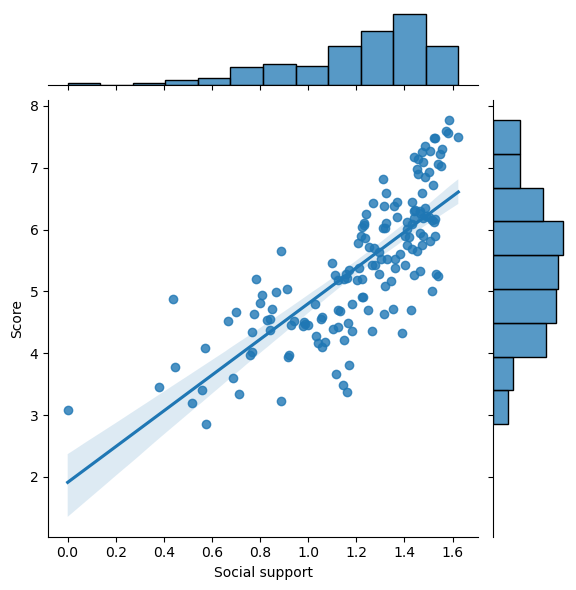

In [87]:
corr_vars = ['Social support',
             'GDP per capita',
             'Healthy life expectancy',
             'Freedom to make life choices',
             'Perceptions of corruption',
             'Generosity'
             ]
# social support
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[0])
ax.plot(sns.regplot, sns.histplot)

In [73]:
happiness.sort_values(by='Social support').iloc[np.r_[0:1, -1:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,"(6.184, 7.769]"


Social support appears to be positively correlated with score, with most nations having a social support score between 0.5 and 1.5. There is also one outlier in the graph, which is the Central African Republic, with a social support score of 0 and an overall happiness score of 3.083. The country with the highest social support score is Iceland, which is 1.624. Iceland has a happiness score of 7.494. This relationship means that those countries with more family social support are typically happier.

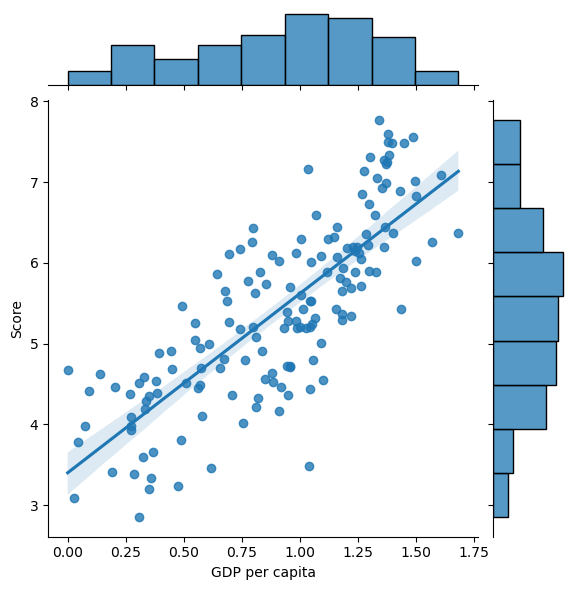

In [86]:
# GDP per capita
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[1])
ax.plot(sns.regplot, sns.histplot)

In [55]:
happiness.sort_values(by='GDP per capita',
                      ascending=False
                      ).iloc[np.r_[0:1, -1:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
28,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,Latin America and Caribbean,"(6.184, 7.769]"
111,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,Middle East and Northern Africa,"(4.544, 5.38]"


GDP per capita and happiness score are very positively correlated with no extreme outliers in the graph. The country with the lowest GDP per capita (0.0), Somalia, has a happiness score of 4.67. The country with the highest GDP per capita (1.684), Qatar, has a happiness score of 6.37. This illustrates that these two variables are correlated and increase together. This means that the richer a country and its economy are, based on its GDP, the happier its citizens are.

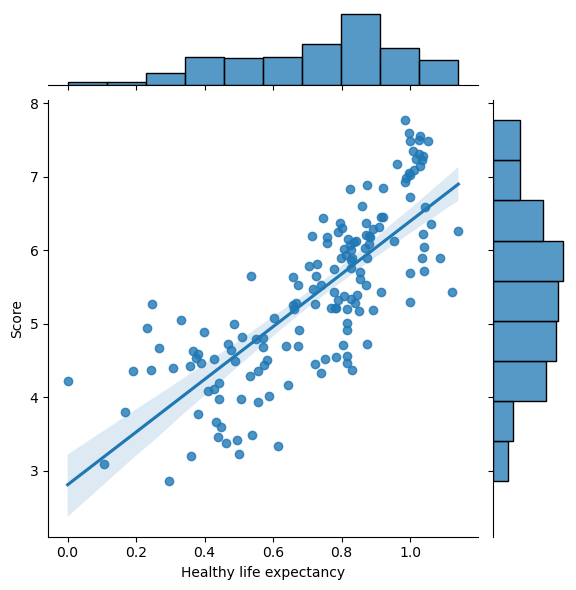

In [85]:
# Healthy life expectancy
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[2])
ax.plot(sns.regplot, sns.histplot)

In [82]:
happiness.sort_values(by='Healthy life expectancy',
                      ascending=False
                      ).iloc[np.r_[0:1, -1:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
33,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Middle East and Northern Africa,"(6.184, 7.769]"
134,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"


Healthy life expectancy and happiness score are strongly positively correlated. Many of the nations in on the graph appear to directly match the regression line. The country with the highest healthy life expectancy is Singapore (1.463) which has a happiness score of 6.262. The country with the lowest healthy life score is Swaziland (0.0), and it has a happiness score of 4.212. This makes sense, as the happiest countries are likely those that are able to live comfortably and healthily.

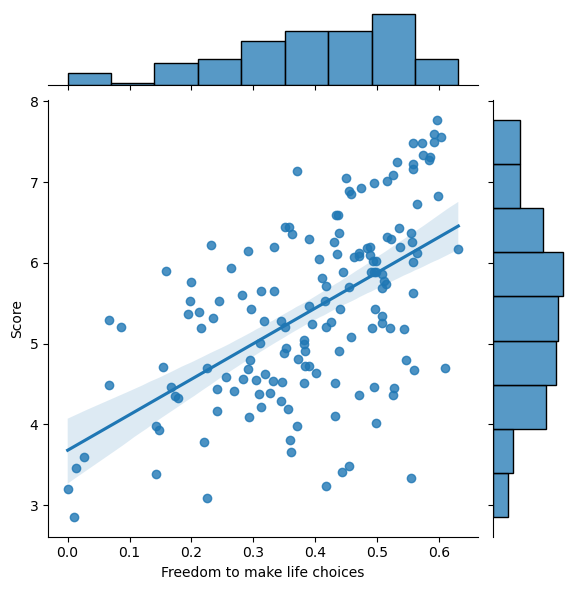

In [84]:
# Freedom to make life choices
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[3])
ax.plot(sns.regplot, sns.histplot)

In [81]:
happiness.sort_values(by='Freedom to make life choices',
                      ascending=False
                      ).iloc[np.r_[0:1, -5:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
40,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,Middle East and Northern Africa,"(5.38, 6.184]"
121,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"
146,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Middle East and Northern Africa,"(2.8520000000000003, 4.544]"
148,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"
155,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Middle East and Northern Africa,"(2.8520000000000003, 4.544]"
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia,"(2.8520000000000003, 4.544]"


The freedom to make life choices and happiness score are positively correlated, with values for freedom spread relatively wide against the regression line. There are 5 outliers at the bottom left corner, which include Afghanistan, South Sudan, Syria, Haiti, and Mauritania. These countries have the lowest freedom of the countries in the dataset, as well as some of the lowest happiness scores. The country with the highest freedom to make life choices is Uzbekistan. The correlation between these two variables makes sense, as general freedoms and free will in guiding one's life would increase a country's overall happiness. 

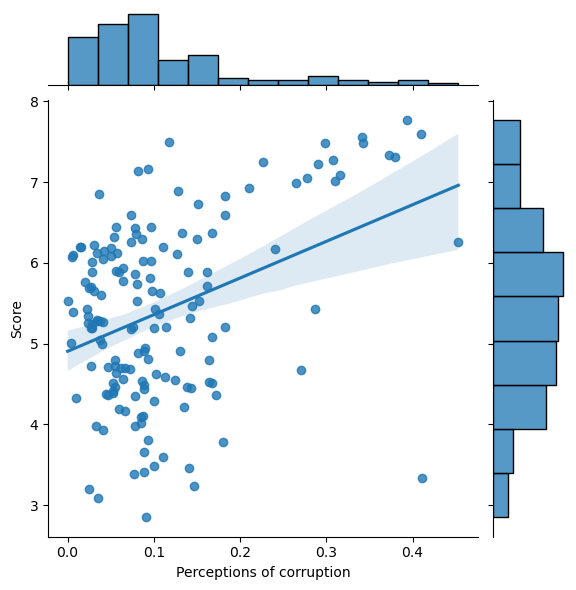

In [88]:
# Perceptions of corruption
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[4])
ax.plot(sns.regplot, sns.histplot)

In [94]:
happiness.sort_values(by='Perceptions of corruption',
                      ascending=False
                      ).iloc[np.r_[0:3, -3:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
33,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Middle East and Northern Africa,"(6.184, 7.769]"
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,"(6.184, 7.769]"
47,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005,Latin America and Caribbean,"(5.38, 6.184]"
96,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004,Sub-Saharan Africa,"(4.544, 5.38]"
70,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000,Central and Eastern Europe,"(5.38, 6.184]"


There appears to be a slight positive correlation between happiness score and perceptions of corruption for a nation. Most nations have between 0 and 0.2 as their perceptions of corruption, but the scores of these countries vary between all values of happiness scores in the data. The countries with the highest perceptions of corruption within the dataset are Singapore, Rwanda, and Denmark. The countries with the lowest perception of corruption include Moldova, Bulgaria, and Romania. The most interesting thing in this data is the high happiness scores of many countries with high perceptions of corruption. A possible reason for this could be that there are some nations with a good standard of living, but have a seemingly corrupt government. 

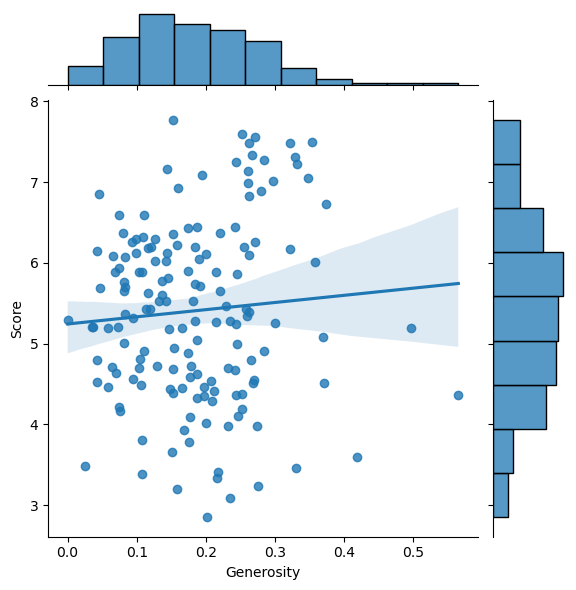

In [95]:
# Generosity
ax = sns.JointGrid(data=happiness, y='Score', x=corr_vars[5])
ax.plot(sns.regplot, sns.histplot)

In [96]:
happiness.sort_values(by='Generosity', ascending=False).iloc[np.r_[0:1, -1:0]]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,Quartile
130,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,Sub-Saharan Africa,"(2.8520000000000003, 4.544]"
81,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034,Southeastern Asia,"(4.544, 5.38]"


From the graph above, it appears that there is no correlation between the generosity of a nation and its respcetive happiness score. The most generous nation in the dataset is Myanmar, which has a happiness score of 4.36. The least generous nation is Greece, which has a happiness score of 5.287. It is interesting that there is no correlation between these variables, and I am curious if culture has a role to play in the generosity of a nation, rather than its overall happiness.

### <font color="magenta"> Q3: Does there appear to be an interaction between region and happiness quartile?
    
Create a new variable that represents which quartile each country's happiness score is in.  For example, the first 39 or 40 countries are in the 4th happiness quartile (it's up to you to decide exactly how to divide the countries into happiness quartiles).
    
(Hint: contingency tables, mosaic plots, and chi-square may be useful here).

In [97]:
happiness['Region'] = happiness2016['Region']
happiness.Region.value_counts()

Sub-Saharan Africa                 37
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [98]:
h_quartile = pd.qcut(happiness.Score, 4)
happiness['Quartile'] = h_quartile

In [99]:
happy_ct = pd.crosstab(happiness['Region'],
                       happiness.Quartile,
                       normalize=False)
happy_ct

Quartile,"(2.8520000000000003, 4.544]","(4.544, 5.38]","(5.38, 6.184]","(6.184, 7.769]"
Region,,,,
Australia and New Zealand,0,0,0,2
Central and Eastern Europe,4,9,15,1
Eastern Asia,0,2,3,1
Latin America and Caribbean,1,2,11,10
Middle East and Northern Africa,3,7,4,5
North America,0,0,0,2
Southeastern Asia,2,4,1,2
Southern Asia,2,5,0,0
Sub-Saharan Africa,27,8,2,0


In [16]:
chi2, p, dof, ex = chi2_contingency(happy_ct)
print('chi2 = ', chi2)
print('p-val = ', p)
print('degrees of freedom = ', dof)
pd.DataFrame(ex, index=happy_ct.index, columns=happy_ct.columns)

chi2 =  137.47662648388604
p-val =  9.219447533481641e-17
degrees of freedom =  27


Quartile,"(2.8520000000000003, 4.544]","(4.544, 5.38]","(5.38, 6.184]","(6.184, 7.769]"
Region,,,,
Australia and New Zealand,0.50,0.50,0.50,0.50
Central and Eastern Europe,7.25,7.25,7.25,7.25
Eastern Asia,1.50,1.50,1.50,1.50
Latin America and Caribbean,6.00,6.00,6.00,6.00
Middle East and Northern Africa,4.75,4.75,4.75,4.75
North America,0.50,0.50,0.50,0.50
Southeastern Asia,2.25,2.25,2.25,2.25
Southern Asia,1.75,1.75,1.75,1.75
Sub-Saharan Africa,9.25,9.25,9.25,9.25


Yes, there appears to be an interaction between region and happiness quartile. If the null hypothesis were true, we would suspect that there is no difference in happiness quartile based on region. The responses would be equally distributed throughout all possible outcomes. With a chi-squared value of 137.477 and 27 degrees of freedom, we find that there is a p-value of 9.219e-17. This means that there is an extreme correlation between these two variables, since any p-value less than .05 rejects our null hypothesis. We reject our null hypothesis and accept the alternative hypothesis that there is an interaction between happiness score and the region of a nation. From the data, we can see that there are a significant portion of Sub-Saharan African nations in the lowest happiness quartile, while there are the most Western European nations in the highest happiness quartile, as well as Latin American and Caribbean nations.

### <font color="magenta">Q4: Use a linear regression to model the relationship between Happiness Score and Family.

What does this tell you about the relationship?


You may wish to include a visualization.

In [110]:
happiness.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region', 'Quartile'],
      dtype='object')

In [111]:
model = smf.ols(" Q('Social support') ~ Q('Score')", data=happiness).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q('Social support')   R-squared:                       0.604
Model:                             OLS   Adj. R-squared:                  0.601
Method:                  Least Squares   F-statistic:                     234.7
Date:                 Wed, 12 Oct 2022   Prob (F-statistic):           8.98e-33
Time:                         21:28:08   Log-Likelihood:                 39.607
No. Observations:                  156   AIC:                            -75.21
Df Residuals:                      154   BIC:                            -69.11
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0795      0.075      1.056      0.293      -0.069       0.228
Q('Score')     0.2089      0.014     15.320      0.000       0.182       0.236
==============================================================================
Omnibus:                       17.124   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.198
Skew:                          -0.626   Prob(JB):                     5.57e-06
Kurtosis:                       4.469   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

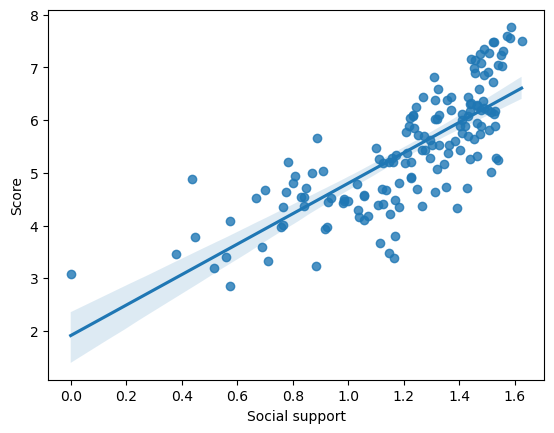

In [112]:
_ = sns.regplot(data=happiness, x='Social support', y='Score')

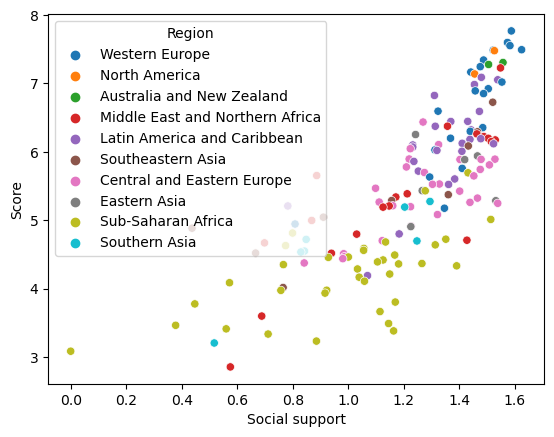

In [113]:
_ = sns.scatterplot(data=happiness, x='Social support', y='Score', hue='Region')

There appears to be a significant positive relationship between family/social support and the happiness score of a nation. As a nation's social and family support increases, their happiness score follows. The p-value of this regression is 8.98e-33, which is the probability of seeing this this result given that the null hypothesis is true. So, we reject the null hypothesis that there is no relationship between social support in favor of the alternative hypothesis that there- in fact- is such a relationship. There is one outlier in the data- the Central African Republic- which was noted in an earlier visualization. When the region of a nation is also added as a factor, we can see the relationship that region has with both variables. Western European nations appear to have the highest social support and happiness score, while Sub-Saharan African nations have the lowest happiness scores and varying values for social support.

### <font color="magenta">Q5: Do happiness scores vary significantly between regions?  Which region has the highest mean happiness score?

You may wish to include a visualization.
Hint: ANOVA might help here.

In [22]:
# ANOVA p < .05, statistically significant difference...
lm = smf.ols('Score ~ Region', data=happiness).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Region,117.326731,9.0,25.471131,6.906799e-26
Residual,74.723824,146.0,NaN,NaN


In [106]:
happiness.groupby('Region')['Score'].mean().sort_values(ascending=False)

Region
North America                      7.309500
Australia and New Zealand          7.292500
Western Europe                     6.682524
Latin America and Caribbean        6.076958
Eastern Asia                       5.617000
Central and Eastern Europe         5.405517
Southeastern Asia                  5.358444
Middle East and Northern Africa    5.343105
Southern Asia                      4.595143
Sub-Saharan Africa                 4.209459
Name: Score, dtype: float64

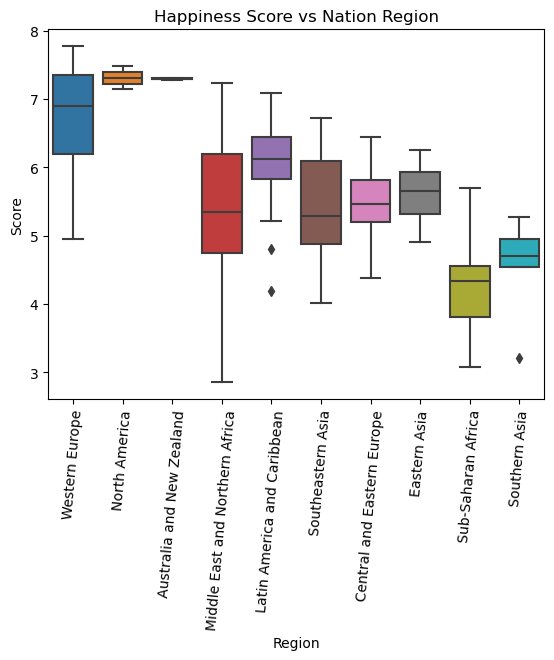

In [122]:
sns.boxplot(x='Region', y='Score', data=happiness)
plt.xticks(rotation=85)
_ = plt.title('Happiness Score vs Nation Region')

The ANOVA table illustrates that there is significant variation in happiness score between regions. The p-value of this ANOVA is 6.907e-26, which means that we can reject the null hypothesis that there is no variation in happiness scores between regions, and accept the alternative hypothesis that there indeed is significant variation in the scores. The region with the highest mean happiness score is North America, with Australia and New Zealand very close behind it.

## <font color='green'> Please submit your completed notebook in .HTML format via Canvas </font>